# Data Exploration
### Import Libraires and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
apple_raw = pd.read_csv('./data/apple_raw.csv')
apple_raw['Date'] = pd.to_datetime(apple_raw['Date'])
apple_raw.set_index("Date", inplace=True)

In [3]:
def cpi_resample():
    cpi_raw = pd.read_csv('./data/data_CPI.csv')
    cpi_raw['Date'] = pd.to_datetime(cpi_raw['Date'])
    cpi_raw.set_index("Date", inplace=True)
    cpi_raw = cpi_raw.resample('D').interpolate() # Up samping to every day
    return cpi_raw

cpi_raw = cpi_resample()
all_cpi = apple_raw.join(cpi_raw) # Merge time series stock data and CPI data

def sentiment_resample():
    sentiment_raw = pd.read_csv('./data/data_sentiment.csv')
    sentiment_raw['Date'] = pd.to_datetime(sentiment_raw['Date'])
    sentiment_raw.set_index("Date", inplace=True)
    sentiment_raw = sentiment_raw.resample('D').interpolate() # Up samping to every day
    return sentiment_raw

sentiment_raw = sentiment_resample()
data_all = all_cpi.join(sentiment_raw) # Merge time series stock data and CPI data
data_all.to_csv("./data/data_all.csv", date_format = "%Y-%m-%d", index = True)

In [4]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
High,1027.0,6.605401e+01,3.118845e+01,3.547000e+01,4.348250e+01,5.179000e+01,7.984375e+01,1.450900e+02
Low,1027.0,6.457573e+01,3.021979e+01,3.501500e+01,4.273375e+01,5.087500e+01,7.834000e+01,1.413700e+02
Open,1027.0,6.531713e+01,3.076197e+01,3.530500e+01,4.309625e+01,5.114750e+01,7.905125e+01,1.436000e+02
Close,1027.0,6.534516e+01,3.071534e+01,3.517000e+01,4.307000e+01,5.132000e+01,7.922625e+01,1.431600e+02
Volume,1027.0,1.278808e+08,5.747164e+07,4.544800e+07,8.828600e+07,1.119123e+08,1.504132e+08,4.265100e+08
Adj Close,1027.0,6.405021e+01,3.104893e+01,3.324841e+01,4.148573e+01,5.003397e+01,7.826125e+01,1.422829e+02
CPI,1027.0,2.544305e+02,5.734973e+00,2.445379e+02,2.508760e+02,2.558381e+02,2.581747e+02,2.691236e+02
Sentiment,1027.0,9.185759e+01,8.834363e+00,7.180000e+01,8.503484e+01,9.614194e+01,9.820806e+01,1.014000e+02


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1027 entries, 2017-04-03 to 2021-04-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1027 non-null   float64
 1   Low        1027 non-null   float64
 2   Open       1027 non-null   float64
 3   Close      1027 non-null   float64
 4   Volume     1027 non-null   float64
 5   Adj Close  1027 non-null   float64
 6   CPI        1027 non-null   float64
 7   Sentiment  1027 non-null   float64
dtypes: float64(8)
memory usage: 104.5 KB


## 1. EDA (Exploratory Data Analysis) 
### 1.1 Overall Trends

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

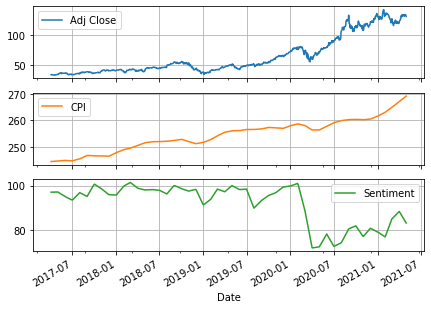

In [33]:
# Overall Trend of features and stock prices
data_all[['Adj Close', 'CPI', 'Sentiment']].plot(subplots=True, figsize=(7, 5), grid=True)
# plt.savefig('./pictures/data_all_subplots.jpg')

It can be observed that, all data and features fell drastically from start of march 2020 (Due to Covid-19). 
### 1.2 Seasonal Decomposition

In [7]:
# Define seasonal decomposition function
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition(feature):
    decomposition = seasonal_decompose(data_all[feature], period=90)  
    fig = plt.figure()
    fig = decomposition.plot()  
    fig.set_size_inches(15, 8)
    fig.savefig('./pictures/' + feature + '_exploration.jpg')

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    return trend, seasonal, residual  

<Figure size 432x288 with 0 Axes>

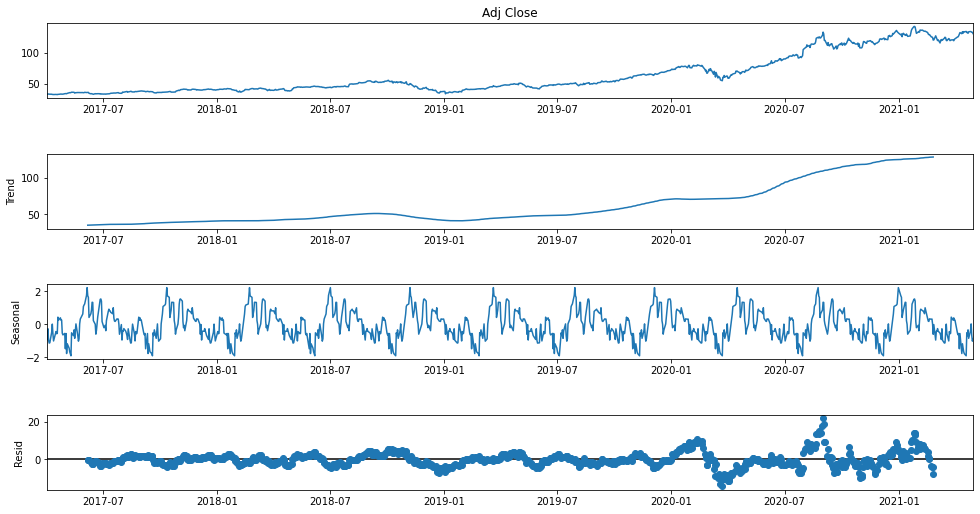

In [34]:
price_trend, price_seasonal, price_residual = seasonal_decomposition('Adj Close')

<Figure size 432x288 with 0 Axes>

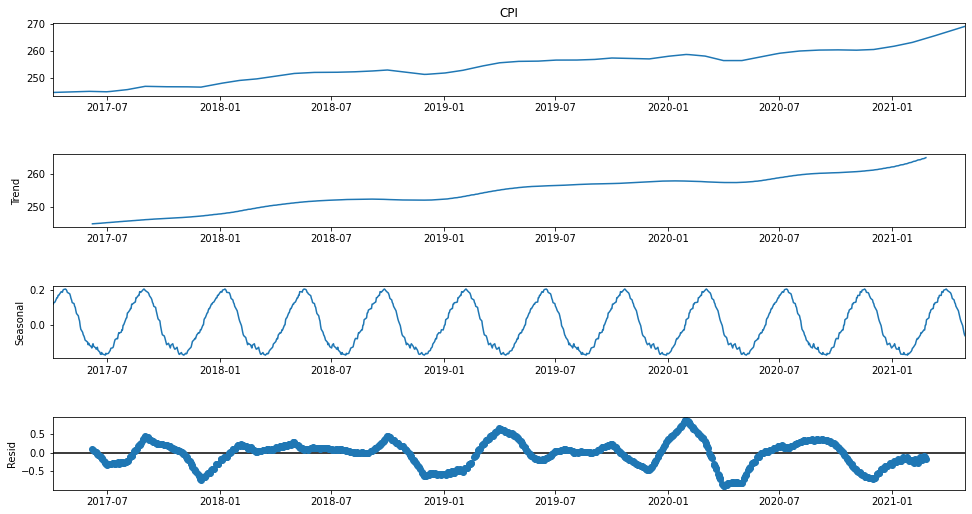

In [9]:
CPI_trend, CPI_seasonal, CPI_residual = seasonal_decomposition('CPI')

<Figure size 432x288 with 0 Axes>

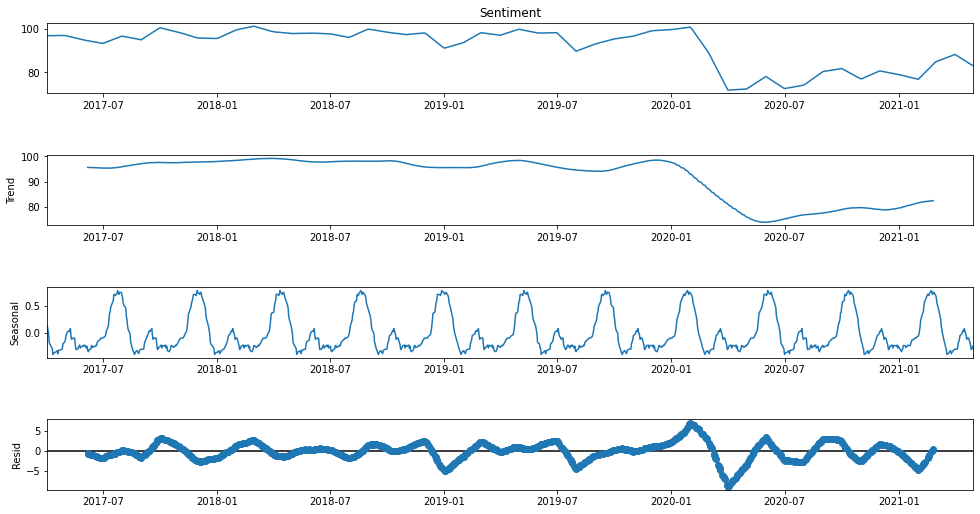

In [10]:
sentiment_trend, sentiment_seasonal, sentiment_residual = seasonal_decomposition('Sentiment')

### 1.3 Data Replationship
#### Covariance
Covariance is a measure of how much two random variables vary together. In the covariance matrix the off-diagonal elements contain the covariances of each pair of variables. The diagonal elements of the covariance matrix contain the variances of each variable. 

    If COV(xi, xj) = 0 then variables are uncorrelated.
    If COV(xi, xj) > 0 then variables positively correlated 
    If COV(xi, xj) < 0 then variables negatively correlated 

If the covariance is positive then the variables grow together, while a negative covariance means they move inversely. A null value means variables are independent.

<AxesSubplot:>

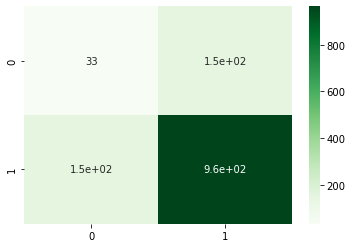

In [41]:
cov_cpi = np.cov(data_all['CPI'], data_all['Adj Close'])

sns.heatmap(cov_cpi, cmap='Greens', annot=True)

<AxesSubplot:>

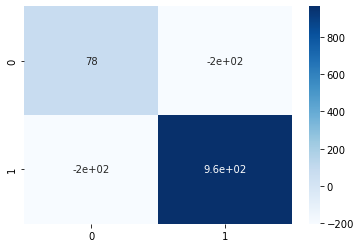

In [42]:
cov_sentiment = np.cov(data_all['Sentiment'], data_all['Adj Close'])

sns.heatmap(cov_sentiment, cmap='Blues', annot=True)

#### Correlation
While covariance indicates the direction of the linear relationship between variables, correlation measures both the strength and direction of the linear relationship between two variables. correlation is a function of covariance.

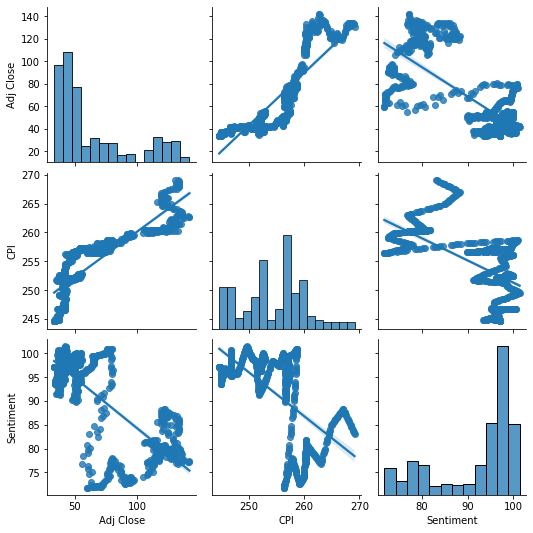

In [13]:
# Draw the pair plot to discover the correlations between each specific data
sns.pairplot(data_all[['Adj Close', 'CPI', 'Sentiment']], kind='reg')
plt.savefig('./pictures/correlation_pariplot.jpg')

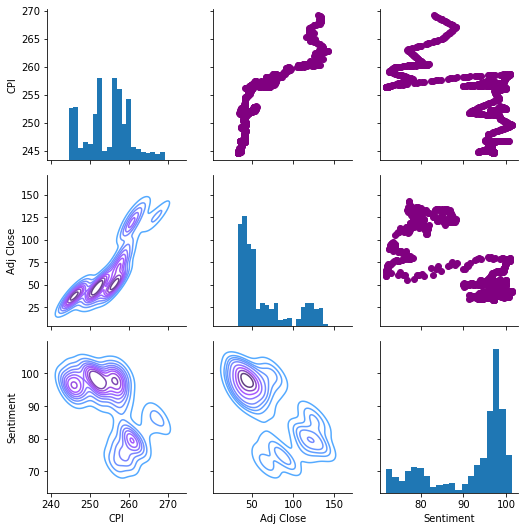

In [40]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(data_all[['CPI', 'Adj Close', 'Sentiment']])

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=20)

plt.savefig('./pictures/correlation_parigrid.jpg')

### 1.4 Exponential Moving Average
The exponential moving average (EMA) is a technical chart indicator that tracks the price of an investment (like a stock or commodity) over time. The EMA is a type of weighted moving average (WMA) that gives more weighting or importance to recent price data.

In [43]:
# Create the function to draw time series pictures
def plot_timeseries(tdf1,tdf2,label1,label2,labely,col,title):
    
    # Figuring the size
    plt.figure(figsize=(17, 6))
    
    # Create a lineplot for different span
    plt.plot(tdf1, color='red', label=label1)
    plt.plot(tdf2, color='purple', label=label2)
    
    # Create a lineplot for data 2
    plt.plot(data_all[col], color='orange', label=labely)

    # # Adjust x-axis Labels
    # ax = plt.gca()
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xlabels)
    
    # Create a title
    plt.title(title)
    plt.grid()
    plt.legend()
    
    # Save the figure
    plt.savefig('./pictures/' + title + '.jpg')

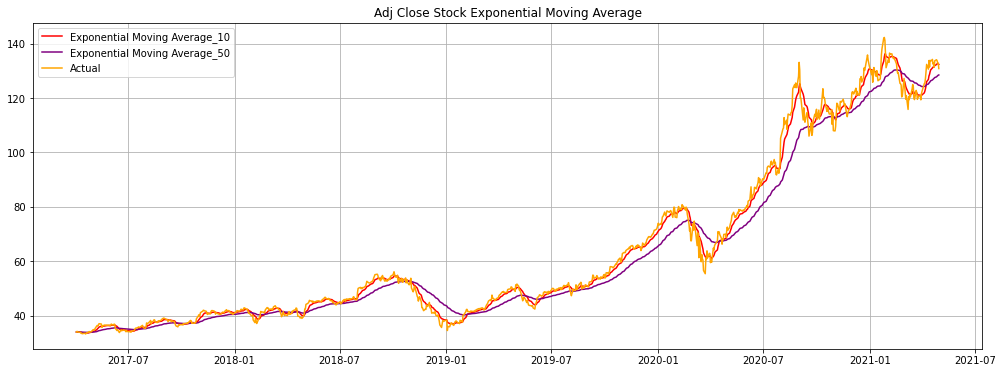

In [44]:
# Prepare Data
expo_mv_open_10 = apple_raw['Adj Close'].ewm(span=10, adjust=False).mean()
expo_mv_open_50 = apple_raw['Adj Close'].ewm(span=50, adjust=False).mean()

# Plotting Data
plot_timeseries(expo_mv_open_10, # Data 1
                expo_mv_open_50, # Data 2
                'Exponential Moving Average_10', # Label 1
                'Exponential Moving Average_50', # Label 2
                'Actual', # Label y
                'Adj Close', # Column of the Data
                'Adj Close Stock Exponential Moving Average') # Title

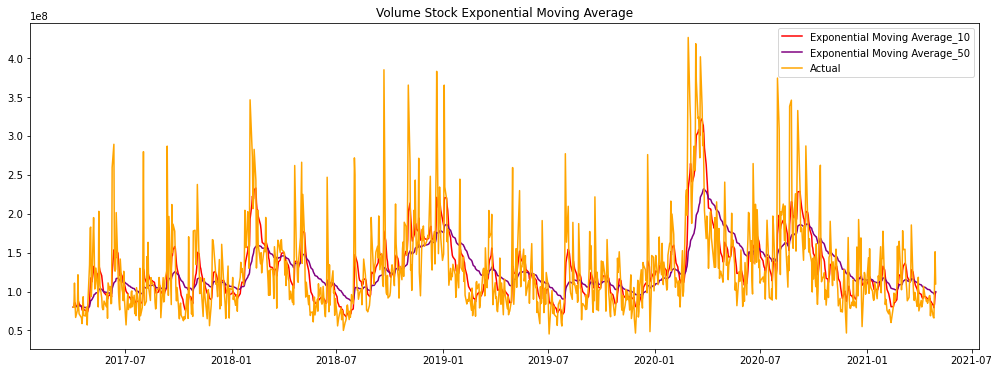

In [17]:
# Prepare Data
expo_mv_volume_10 = apple_raw['Volume'].ewm(span=10, adjust=False).mean()
expo_mv_volume_50 = apple_raw['Volume'].ewm(span=50, adjust=False).mean()

# Plotting Data
plot_timeseries(expo_mv_volume_10, # Data 1
                expo_mv_volume_50, # Data 2
                'Exponential Moving Average_10', # Label 1
                'Exponential Moving Average_50', # Label 2
                'Actual', # Label y
                'Volume', # Column of the Data
                'Volume Stock Exponential Moving Average') # Title

### 1.5 Time Series Lag Plot
A lag plot helps to check if a time series data set is random or not. A random data will be evenly spread whereas a shape or trend indicates the data is not random.

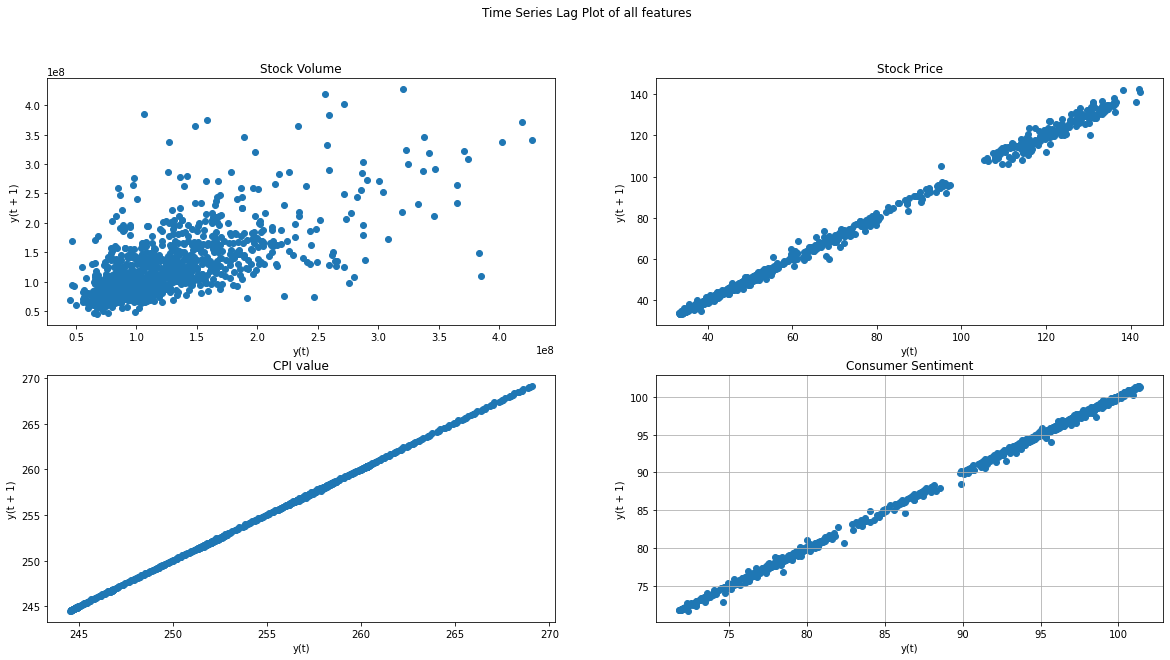

In [18]:
plt.figure(figsize=(20,10))

# Stock High
plt.subplot(2, 2, 1)
pd.plotting.lag_plot(data_all['Volume'])
plt.title("Stock Volume")

# Stock Open
plt.subplot(2, 2, 2)
pd.plotting.lag_plot(data_all['Adj Close'])
plt.title("Stock Price")

# Stock Adj Close
plt.subplot(2, 2, 3)
pd.plotting.lag_plot(data_all['CPI'])
plt.title("CPI value")

# Stock Volume
plt.subplot(2, 2, 4)
pd.plotting.lag_plot(data_all['Sentiment'])
plt.title("Consumer Sentiment")

plt.suptitle("Time Series Lag Plot of all features")
plt.grid()
plt.savefig('./pictures/lag_plot_all.jpg')

### 1.6 Daily Return 
In stock exchange there is a limit on per day fluctuation of stock. So if the stock reaches the threshold value then the trading of the stock is stopped for that day.

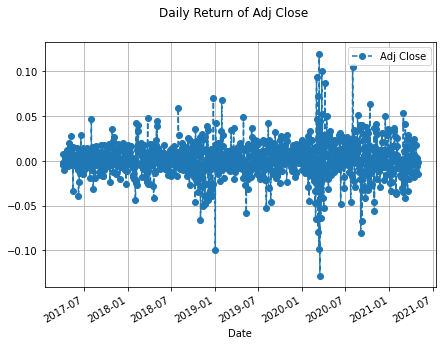

In [52]:
daily_return = data_all['Adj Close'].pct_change()
daily_return.plot(figsize=(7, 5), legend=True, linestyle='--', marker='o')
plt.suptitle("Daily Return of Adj Close")
plt.grid()
plt.savefig('./pictures/daily_return.jpg')

C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


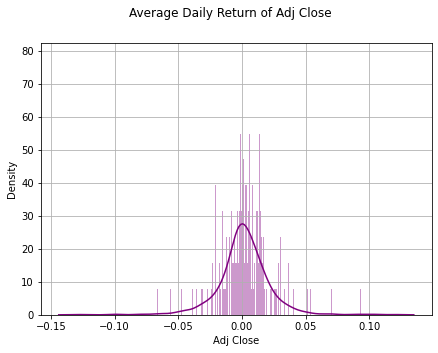

In [51]:
plt.figure(figsize=(7, 5))
sns.distplot(daily_return.dropna(), bins=2000, color='purple')
plt.suptitle("Average Daily Return of Adj Close")
plt.grid()
plt.savefig('./pictures/daily_return_avg.jpg')

So the stock fluction follows a normal distribution betweem +2% and -2%.

## 2. Hypothesis Testing
Test whether the 2 auxiliary data are relate to the stock price
### Sentiment & Stock

In [21]:
#@Helper Function
#Counting the sentiment if relates to stock price

def count_sentiment_stock(df_return, sentiment_return, daily_return):

    pos_sent = len(sentiment_return[(sentiment_return.values >= 0)])
    neg_sent = len(sentiment_return[(sentiment_return.values < 0)])

    pos_daily = len(daily_return[(daily_return.values >= 0)])
    neg_daily = len(daily_return[(daily_return.values < 0)])

    pos_sent_pos_daily = len(df_return[(df_return['Sentiment'] >= 0) & 
                                                 (df_return['Adj Close'] >= 0)]) 
    
    pos_sent_neg_daily = len(df_return[(df_return['Sentiment'] >= 0) & 
                                                 (df_return['Adj Close'] < 0)]) 
    
    neg_sent_pos_daily = len(df_return[(df_return['Sentiment'] < 0) & 
                                                 (df_return['Adj Close'] >= 0)]) 

    neg_sent_neg_daily = len(df_return[(df_return['Sentiment'] < 0) & 
                                                 (df_return['Adj Close'] < 0)]) 

    pos_return_day = [pos_sent_pos_daily, neg_sent_pos_daily]
    neg_return_day = [pos_sent_neg_daily, neg_sent_neg_daily]
    Total =[pos_sent, neg_sent]

    index = ['Pos Sentiment','Neg Sentiment']
    d = {'Pos Return': pos_return_day, 'Neg Return': neg_return_day}
    
    Table_Simple = pd.DataFrame(data=d, index=index, columns=None)
    
    pos_return_day = [pos_sent_pos_daily, neg_sent_pos_daily, pos_daily]
    neg_return_day = [pos_sent_neg_daily, neg_sent_neg_daily, neg_daily]
    Total =[pos_sent, neg_sent, (pos_sent + neg_sent)]

    index = ['Pos Sentiment','Neg Sentiment', 'Total']
    d = {'Pos Return': pos_return_day, 'Neg Return': neg_return_day, 'Total': Total}
    Table_with_Total = pd.DataFrame(data=d, index=index, columns=None)
    
    return (Table_Simple, Table_with_Total)

In [22]:
sentiment_return = data_all['Sentiment'].pct_change()
cpi_return = data_all['CPI'].pct_change()
data_col = {'Adj Close': daily_return, 'Sentiment': sentiment_return, 'CPI': cpi_return}
df_return = pd.DataFrame(data_col)
df_return

,Adj Close,Sentiment,CPI
Date,,,
2017-04-03,NaN,NaN,NaN
2017-04-04,0.007446,0.000034,0.000028
2017-04-05,-0.005181,0.000034,0.000028
2017-04-06,-0.002499,0.000034,0.000028
2017-04-07,-0.002228,0.000034,0.000028
...,...,...,...
2021-04-26,0.002978,-0.006403,0.000797
2021-04-27,-0.002450,-0.002148,0.000265
2021-04-28,-0.006027,-0.002153,0.000265


In [23]:
SentTable, SentTable_with_Total = count_sentiment_stock(df_return, sentiment_return, daily_return)

SentTable_with_Total

,Pos Return,Neg Return,Total
Pos Sentiment,304,235,539
Neg Sentiment,249,238,487
Total,553,473,1026


In [64]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# def get_statistical(Table):
#     stat, p, dof, expected = chi2_contingency(Table)
#     print("statistic",stat)
#     print("p-value",p)
#     print("degres of fredom: ",dof)
#     print("table of expected frequencies\n",expected)
#     return stat, p, dof, expected
sent_stat, sent_p, sent_dof, sent_expected = chi2_contingency(SentTable)
print("statistic", sent_stat)
print("p-value", sent_p)
print("degres of fredom: ", sent_dof)
print("table of expected frequencies\n", sent_expected)

statistic 53.01410892491391
p-value 3.311610913501862e-13
degres of fredom:  1
table of expected frequencies
 [[263.56432749 225.43567251]
 [289.43567251 247.56432749]]


In [65]:
# sent_stat, sent_p, sent_dof, sent_expected = get_statistical(SentTable)

prob = 0.99
sent_critical = chi2.ppf(prob, sent_dof)
if abs(sent_stat) >= sent_critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


### CPI & Stock

In [26]:
#@Helper Function
#Counting the CPI if relates to stock price

def count_cpi_stock(df_return, cpi_return, daily_return):

    pos_cpi = len(cpi_return[(cpi_return.values >= 0)])
    neg_cpi = len(cpi_return[(cpi_return.values < 0)])

    pos_daily = len(daily_return[(daily_return.values >= 0)])
    neg_daily = len(daily_return[(daily_return.values < 0)])

    pos_cpi_pos_daily = len(df_return[(df_return['CPI'] >= 0) & 
                                                 (df_return['Adj Close'] >= 0)]) 
    
    pos_cpi_neg_daily = len(df_return[(df_return['CPI'] >= 0) & 
                                                 (df_return['Adj Close'] < 0)]) 
    
    neg_cpi_pos_daily = len(df_return[(df_return['CPI'] < 0) & 
                                                 (df_return['Adj Close'] >= 0)]) 

    neg_cpi_neg_daily = len(df_return[(df_return['CPI'] < 0) & 
                                                 (df_return['Adj Close'] < 0)]) 

    pos_return_day = [pos_cpi_pos_daily, neg_cpi_pos_daily]
    neg_return_day = [pos_cpi_neg_daily, neg_cpi_neg_daily]
    Total =[pos_cpi, neg_cpi]

    index = ['Pos CPI','Neg CPI']
    d = {'Pos Return': pos_return_day, 'Neg Return': neg_return_day}
    
    Table_Simple = pd.DataFrame(data=d, index=index, columns=None)
    
    pos_return_day = [pos_cpi_pos_daily, neg_cpi_pos_daily, pos_daily]
    neg_return_day = [pos_cpi_neg_daily, neg_cpi_neg_daily, neg_daily]
    Total =[pos_cpi, neg_cpi, (pos_cpi + neg_cpi)]

    index = ['Pos CPI', 'Neg CPI', 'Total']
    d = {'Pos Return': pos_return_day, 'Neg Return': neg_return_day, 'Total': Total}
    Table_with_Total = pd.DataFrame(data=d, index=index, columns=None)
    
    return (Table_Simple, Table_with_Total)

In [27]:
CPITable, CPITable_with_Total = count_cpi_stock(df_return, cpi_return, daily_return)

CPITable_with_Total

,Pos Return,Neg Return,Total
Pos CPI,448,345,793
Neg CPI,105,128,233
Total,553,473,1026


In [28]:
cpi_stat, cpi_p, cpi_dof, cpi_expected = chi2_contingency(CPITable)
print("statistic", cpi_stat)
print("p-value", cpi_p)
print("degres of fredom: ", cpi_dof)
print("table of expected frequencies\n", cpi_expected)

statistic 9.014037725989766
p-value 0.0026791390219655475
degres of fredom:  1
table of expected frequencies
 [[427.41617934 365.58382066]
 [125.58382066 107.41617934]]


In [67]:
prob = 0.99

cpi_critical = chi2.ppf(prob, cpi_dof)
if abs(cpi_stat) >= cpi_critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [68]:
cpi_critical

6.6348966010212145